In [1]:
import MEArec as mr
import numpy as np
import matplotlib.pyplot as plt
import MEAutility as mu
import LFPy
from matplotlib.collections import LineCollection
from neuron import h
import os
import inspect
from pathlib import Path
import shutil
import plotly
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%run ZIAD_MEARecHelperFunctions.ipynb

### Load apical dendrite info for each cell from template into new file

In [24]:
# Load template
#templates_file = 'ziad_mearec_templates/mag_templates_flattened_5-25bound_2-4cells_n300_100MEA75.h5'
mea_name = '400MEA100'
templates_file = f'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

# Get cell information
mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
cell_name = 'L5_TTPC1_cADpyr232_1'
cell_model_folder = Path(Path(mea_cells_folder) / cell_name)

all_y = []
all_z = []

for k in range(len(tempgen.locations)):
    # Load cell
    cell = mr.return_bbp_cell(cell_model_folder, end_T=1000, dt=0.03125, start_T=0)
    
    # Flatten cell appropriately and move to defined location
    pos = tempgen.locations[k]
    rot = tempgen.rotations[k]

    cell = mr.ziad_flatten_geometry(cell, pos, rot, 10)
    cell.set_pos(pos[0], pos[1], pos[2])
    cell.set_rotation(rot[0], rot[1], rot[2])

    # Get coordinates of apical dendrite
    ycoords, zcoords = get_apical_coords(cell, cell_name)

    # Store in new array and save
    all_y.append(ycoords)
    all_z.append(zcoords)
    
with open(f'mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.npy', 'wb') as f:
    np.save(f, np.array(all_y))
    np.save(f, np.array(all_z))
    np.save(f, tempgen.mags[:, :, 0, :])

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.17022005  355.82405691 -807.31528467]
Ziad Faltten Rotation:  [1.89961158 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  13.96767474   62.68902542 -130.50085924]
Ziad Faltten Rotation:  [4.3053611 0.        0.       ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C06011

Ziad Flatten Position:  [  15.59716982 -787.22209204 -691.2615383 ]
Ziad Faltten Rotation:  [6.07757642 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 11.95429481 131.39466755 759.08228238]
Ziad Faltten Rotation:  [5.32078228 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 12.39847759 -10.06191146 193.72848519]
Ziad Faltten Rotation:  [5.20864061 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models

Ziad Flatten Position:  [ 18.79998289 652.20475866 262.79249699]
Ziad Faltten Rotation:  [1.69776858 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 12.52366702 573.16017746  44.75915379]
Ziad Faltten Rotation:  [5.04012674 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 15.72488517 376.52517834  30.70377835]
Ziad Faltten Rotation:  [4.84360646 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/ME

Ziad Flatten Position:  [  14.65001482  722.79154035 -449.88613407]
Ziad Faltten Rotation:  [1.67806299 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  18.45851483 -115.03842838  523.27594072]
Ziad Faltten Rotation:  [3.93639146 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  11.43423049 -680.90515673 -777.8927817 ]
Ziad Faltten Rotation:  [0.41924552 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_

Ziad Flatten Position:  [ 19.72787592 431.97191321 523.64411099]
Ziad Faltten Rotation:  [3.97484241 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  16.6873277   -37.33503136 -786.28478357]
Ziad Faltten Rotation:  [2.21800265 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 14.92071801 371.59730591 -50.66522647]
Ziad Faltten Rotation:  [2.87395985 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models

Ziad Flatten Position:  [  14.94116266 -594.05975576 -474.07669489]
Ziad Faltten Rotation:  [0.47870841 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.079217   -385.09747379 -230.84550165]
Ziad Faltten Rotation:  [0.67899449 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.27903978  387.7252322  -565.36065186]
Ziad Faltten Rotation:  [3.46258284 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_

Ziad Flatten Position:  [  14.18578026  296.29581377 -164.74511736]
Ziad Faltten Rotation:  [3.17767081 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 17.94578351  11.4340761  471.2909788 ]
Ziad Faltten Rotation:  [4.37161549 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  17.77848477 -151.0301666   238.6495726 ]
Ziad Faltten Rotation:  [1.12968089 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [  14.22752662 -633.87316496  199.72771376]
Ziad Faltten Rotation:  [0.30154617 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  13.78580593 -503.56627005  398.91279888]
Ziad Faltten Rotation:  [2.13866616 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 17.95301167 -19.53998322  41.45615263]
Ziad Faltten Rotation:  [0.17901329 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [ 13.25809967 629.57115644 406.50796928]
Ziad Faltten Rotation:  [4.79175878 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.69479029 -467.11532851 -740.51774648]
Ziad Faltten Rotation:  [2.02210999 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 10.37112664 313.07648937 275.11530158]
Ziad Faltten Rotation:  [2.70473398 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models

Ziad Flatten Position:  [  10.36068315 -484.205882    465.60642131]
Ziad Faltten Rotation:  [0.07600618 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 12.93376278 692.75338096  11.49786903]
Ziad Faltten Rotation:  [2.85691552 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.87871506 -380.9177046  -314.45939655]
Ziad Faltten Rotation:  [2.33517458 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [  14.87193909 -129.2104135  -384.37047688]
Ziad Faltten Rotation:  [5.72276375 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  18.89442475  134.70119809 -308.06708878]
Ziad Faltten Rotation:  [0.00480278 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  12.27597738 -572.67313081 -478.95437364]
Ziad Faltten Rotation:  [5.63176072 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_

Ziad Flatten Position:  [  11.04953668 -179.46945465   61.35016803]
Ziad Faltten Rotation:  [2.13128275 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  15.55900211   59.38083994 -176.66404454]
Ziad Faltten Rotation:  [4.37479396 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 16.78482454 302.49458624  99.30838296]
Ziad Faltten Rotation:  [2.24988245 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [ 17.02523034  -6.25981873 215.13296428]
Ziad Faltten Rotation:  [2.22044217 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  12.87043946 -592.37051129  705.88482145]
Ziad Faltten Rotation:  [5.05693276 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  19.38028543 -508.11045269  699.54655696]
Ziad Faltten Rotation:  [5.87951081 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [  12.87986879 -299.71618584  171.02262337]
Ziad Faltten Rotation:  [3.73753477 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  18.78660976 -396.31977961  429.8942098 ]
Ziad Faltten Rotation:  [5.91256073 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [ 10.01032933 -38.61607443 253.62013137]
Ziad Faltten Rotation:  [5.29875603 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_mod

Ziad Flatten Position:  [  19.86246782 -761.88816844  698.91371136]
Ziad Faltten Rotation:  [5.84873426 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  13.90918712 -461.13923312  192.52947616]
Ziad Faltten Rotation:  [1.11823316 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  18.03208194 -397.39682276 -337.84805962]
Ziad Faltten Rotation:  [5.75486863 0.         0.        ]
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_

In [3]:
# PLOT CELL TEMPLATE
templates_file = 'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_400MEA75.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

# Which cell type (calculate based on ID of template and number of iterations per cell type)
mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
cell_name = 'L5_TTPC1_cADpyr232_1'
cell_model_folder = Path(Path(mea_cells_folder) / cell_name)

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  14.17304802   71.0880547  -435.58132063]
Ziad Faltten Rotation:  [1.24470837 0.         0.        ]
Real morph
SNR:  20.0
Real morph


/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_55556/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)
/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_55556/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)


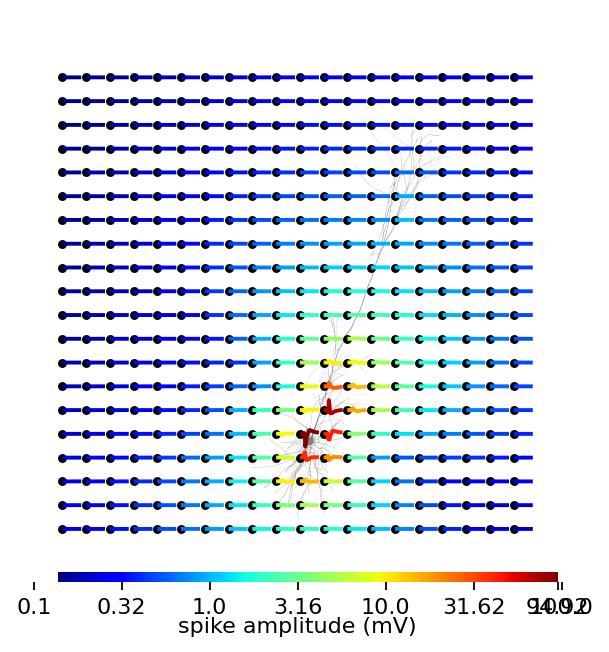

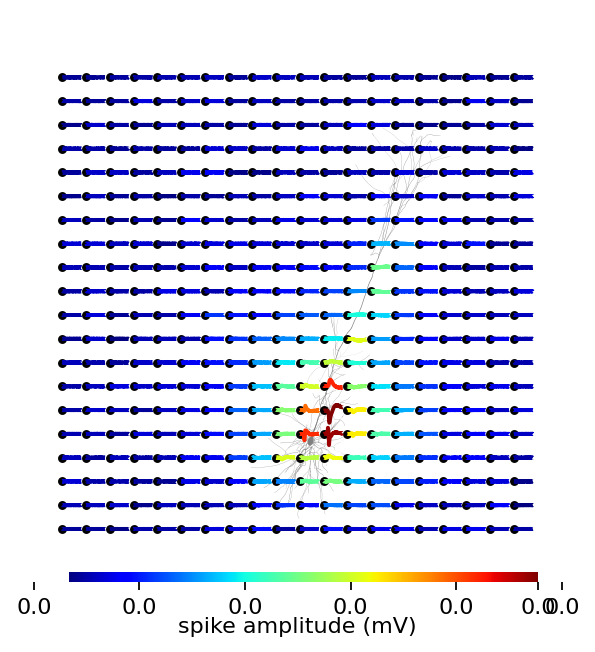

In [38]:
template_id = 2

# Load cell and position and rotation info
T = 1000
dt = 0.03125
cell = mr.return_bbp_cell(cell_model_folder, end_T=T, dt=dt, start_T=0)

pos = tempgen.locations[template_id]
rot = tempgen.rotations[template_id]

cell = mr.ziad_flatten_geometry(cell, pos, rot, 10)
cell.set_pos(pos[0], pos[1], pos[2])
cell.set_rotation(rot[0], rot[1], rot[2])

mea_name = '400MEA75'
mea = mu.return_mea(mea_name)
electrodes = LFPy.RecExtElectrode(cell, probe=mea)

real_morph = True
scale_mult = 40
time_scale = 8
t = np.arange(0, 7, dt)
dim=0
    
fig = plotstuff2(cell, t, tempgen.templates[template_id], electrodes, 0, False, real_morph, scale_mult, time_scale)
fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 0, :] + generate_noise(20, mags[template_id], np.shape(mags[template_id])), electrodes, 0, False, real_morph, scale_mult, time_scale)


/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_55556/1623050749.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot([xlim, xlim, -xlim, -xlim], [ylim, -ylim, ylim, -ylim], '.', marker='o', markersize=1, color='blue')


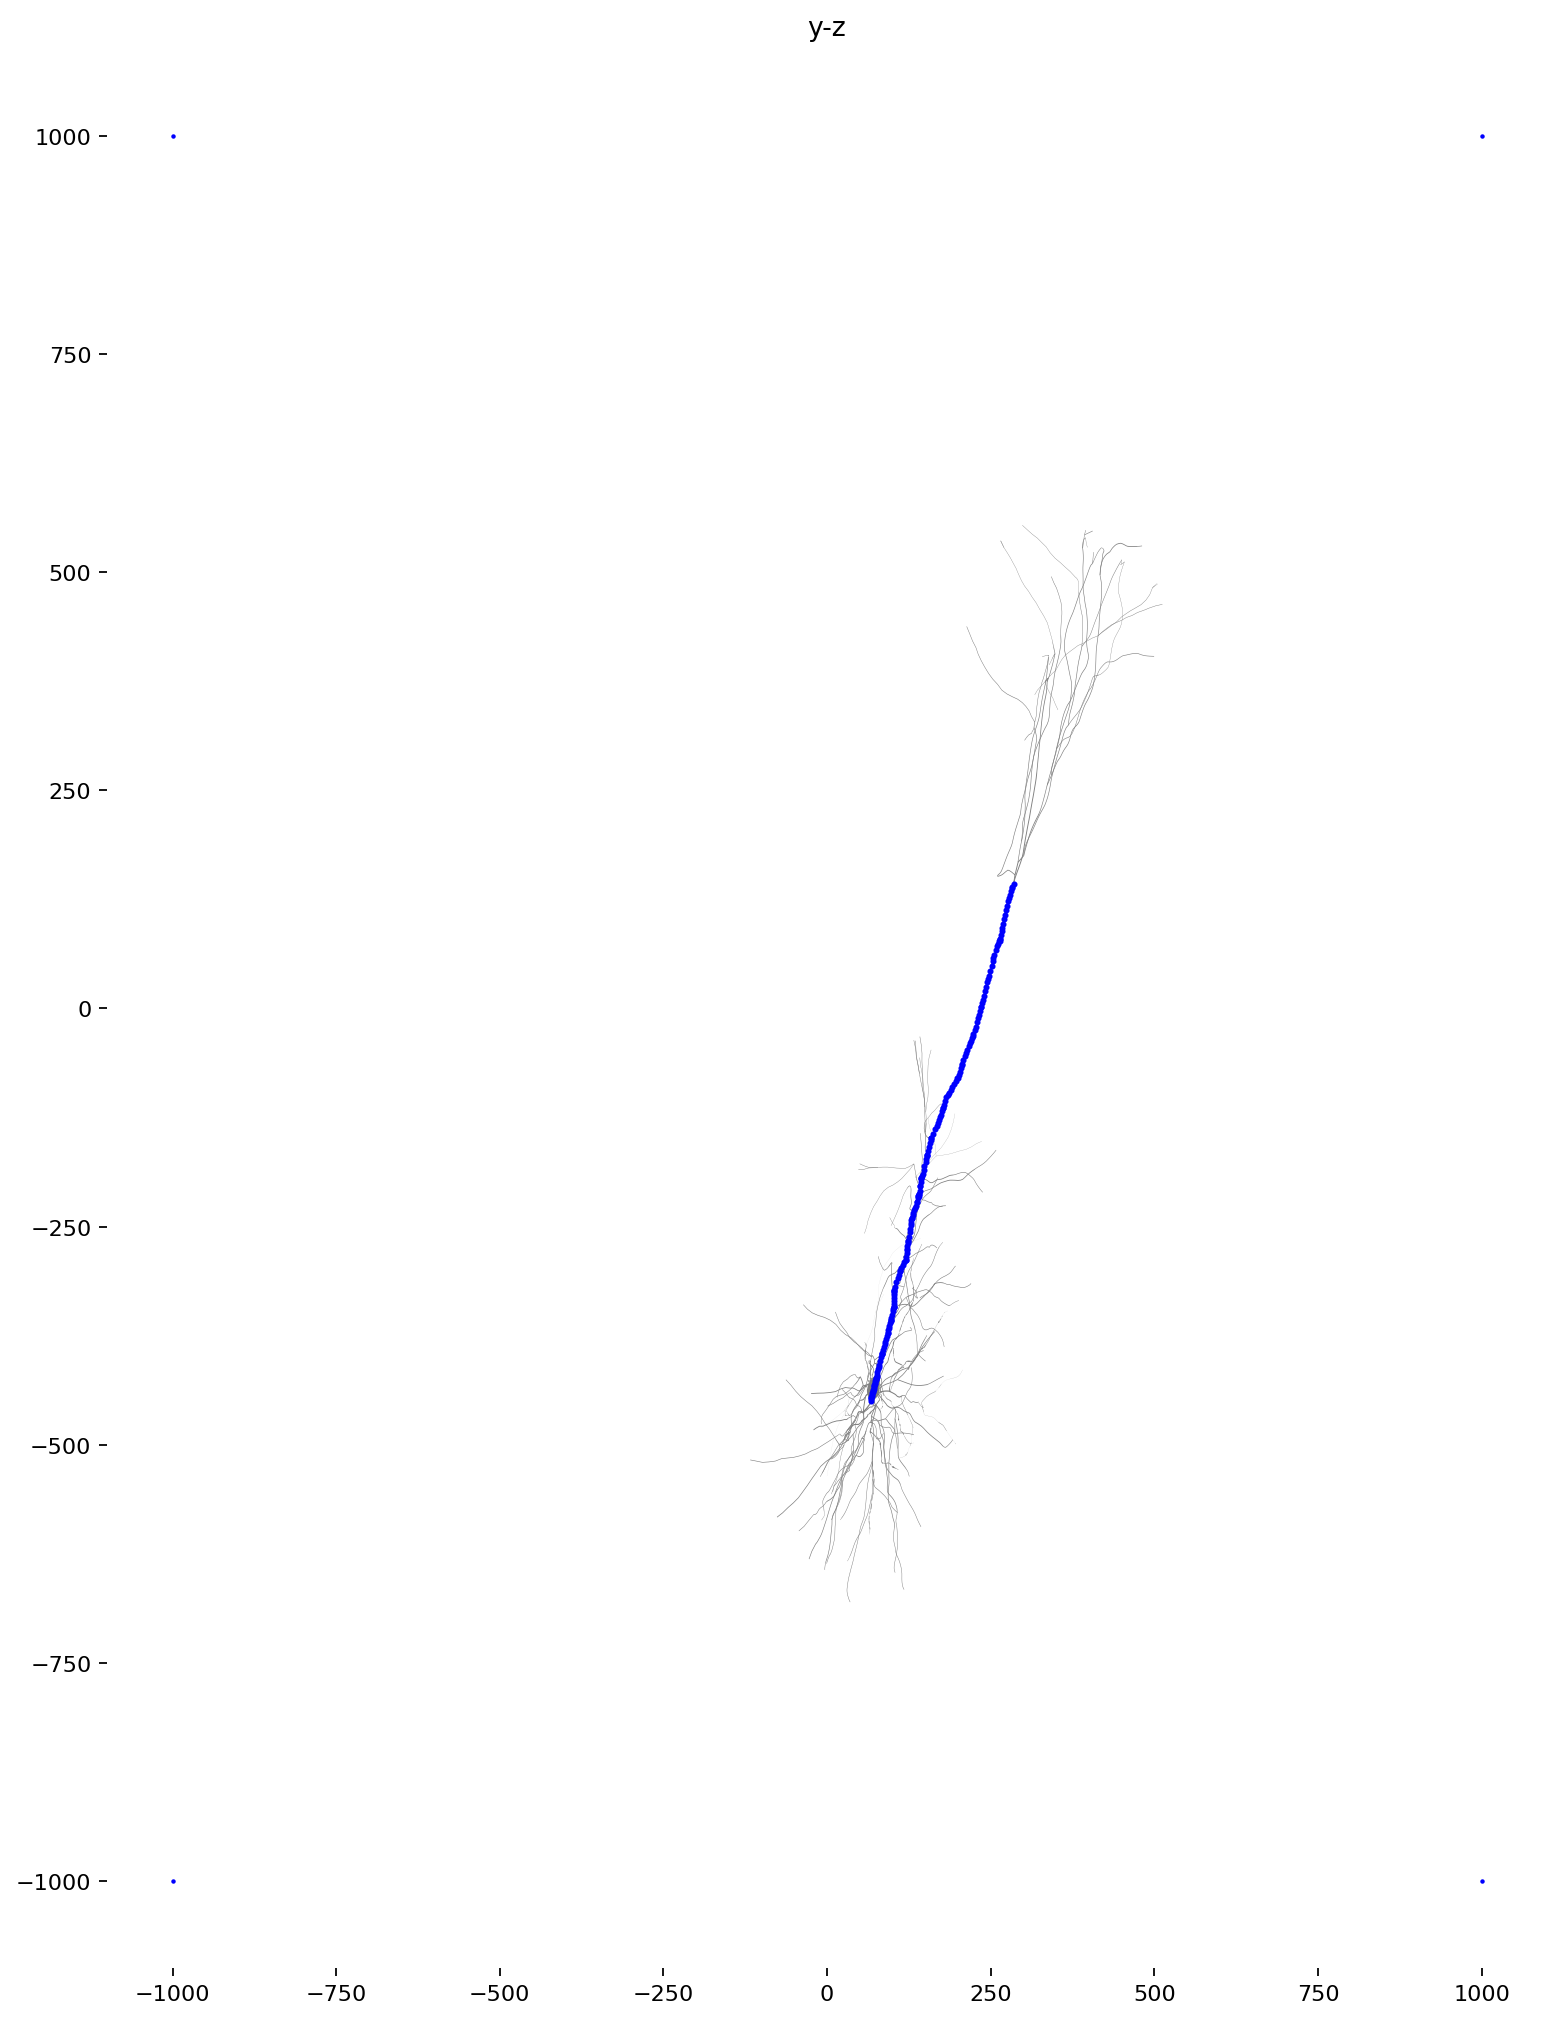

In [9]:
plotcell_1plane(cell, 1000, 1000)
ycoords, zcoords = get_apical_coords(cell, cell_name)
plt.scatter(ycoords, zcoords, s=3, color='blue')

### Run SVM for Morphology Reconstruction

In [9]:
from sklearn import svm, datasets
from scipy.spatial import distance
import time

In [4]:
# Get all signals from the grid of electrodes that exceed a certain threshold
def get_strong_signals(data, electrodes, thresh):
    data = data/np.max(abs(data))
    
    coords = []
    targets = []
    for i in range(len(data)):
        if np.max(abs(data[i])) >= thresh:
            coords.append([electrodes.y[i], electrodes.z[i]])
            
            # Target is 1 if signal is positive, 0 if negative
            targets.append(np.max(data[i]) > abs(np.min(data[i])))
            
    return np.array(coords), np.array(targets)

def get_electrodes(mea_name):
    mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
    cell_name = 'L5_TTPC1_cADpyr232_1'
    cell_model_folder = Path(Path(mea_cells_folder) / cell_name)
    
    cell = mr.return_bbp_cell(cell_model_folder, end_T=1000, dt=0.03125, start_T=0)
    mea = mu.return_mea(mea_name)
    electrodes = LFPy.RecExtElectrode(cell, probe=mea)
    
    return electrodes

def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def load_cell(template_id, tempgen):
    # Load cell and position and rotation info
    mea_cells_folder = '/Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/'
    cell_name = 'L5_TTPC1_cADpyr232_1'
    cell_model_folder = Path(Path(mea_cells_folder) / cell_name)
    
    T = 1000
    dt = 0.03125
    cell = mr.return_bbp_cell(cell_model_folder, end_T=T, dt=dt, start_T=0)

    pos = tempgen.locations[template_id]
    rot = tempgen.rotations[template_id]

    cell = mr.ziad_flatten_geometry(cell, pos, rot, 10)
    cell.set_pos(pos[0], pos[1], pos[2])
    cell.set_rotation(rot[0], rot[1], rot[2])

    return cell

def get_apic_dist(template_id, all_y, all_z, clf, verbose=False):
    coords = np.zeros((2, np.shape(all_y)[1]))
    coords[0] = all_y[template_id]
    coords[1] = all_z[template_id]
    dists = abs(clf.decision_function(coords.T))/np.linalg.norm(clf.coef_)
    if verbose:
        print(dists)
    
    return np.mean(dists), np.std(dists)

def get_apic_dist_real(template_id, all_y, all_z, xx, yy, clf, boundary = [], verbose=False):
    coords = np.zeros((np.shape(all_y)[1], 2))
    coords[:, 0] = all_y[template_id]
    coords[:, 1] = all_z[template_id]
    
    if len(boundary) == 0:
        dists = distance.cdist(coords, get_boundary_coords(xx, yy, clf), 'euclidean')
    else:
        dists = distance.cdist(coords, boundary, 'euclidean')
        
    dists = np.min(dists, axis=1)
    if verbose:
        print(dists)
        plt.hist(dists, bins=30)
        
    return np.mean(dists), np.std(dists)

def get_boundary_coords(xx, yy, clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    boundary = []
    for i in range(len(xx)):
        for j in range(1, len(xx[0])):
            if j > 0:
                if Z[i, j] != Z[i, j-1]:
                    #print("hit1")
                    midx = (xx[i, j] + xx[i, j-1]) / 2
                    midy = yy[i, j]
                    boundary.append([midx, midy])
            if i > 0:
                if Z[i, j] != Z[i-1, j]:
                    #print("hit2")
                    midx = xx[i, j]
                    midy = (yy[i, j] + yy[i-1, j]) / 2
                    boundary.append([midx, midy])
    #print(boundary)
    boundary = np.array(boundary)
    return boundary

def generate_noise(snr, sig, shape):
    noise = np.random.normal(size=shape)
    
    sig_pwr = np.sum(sig**2)
    noise_pwr = sig_pwr/(10**(snr/10))
    noise_coeff = np.sqrt(noise_pwr/np.sum(noise**2))
    noise = noise*noise_coeff
    
    new_noise_pwr = np.sum(noise**2)
    
    print("SNR: ", 10*np.log10(sig_pwr/noise_pwr))
    return noise

In [61]:
# Load template
templates_file = 'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_400MEA75.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

with open('mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_400MEA75.npy', 'rb') as f:
    all_y = np.load(f)
    all_z = np.load(f)
    mags = np.load(f)

# Save coordinates with positive/negative data that exceed some threshold
plot = False
thresh = 0
elecs = get_electrodes('400MEA75')

template_id = 43
cell = load_cell(template_id, tempgen)

snr = 20
noise = generate_noise(snr, mags[template_id], np.shape(mags[template_id]))
sig = mags[template_id] + noise
coords, targets = get_strong_signals(sig, elecs, thresh)

if plot:
    plt.scatter(coords.T[0], coords.T[1])
    plt.xlim([np.min(electrodes.y)-20, np.max(electrodes.y)+20])
    plt.ylim([np.min(electrodes.z)-20, np.max(electrodes.z)+20])

# Do SVM
model = svm.SVC(kernel="rbf")
clf = model.fit(coords, targets)

# Learn what best parameters are for SVM by matching to apical dendrite coordinates

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  17.99615262 -563.75060993  327.32666723]
Ziad Faltten Rotation:  [4.59758639 0.         0.        ]
SNR:  20.0


[ 23.20864201  22.00479512  20.79324492  19.58665449  18.38606028
  17.17416937  15.96513594  14.76316413  13.55717265  12.34452631
  11.14034912   9.94461138   8.72584003   7.51773259   6.32640045
   5.11336303   3.89584091   2.70926178   1.55088358   0.30301561
   0.60333991   1.64377411   2.31218777   5.11715368   7.83913928
  10.02105345  12.39600173  16.00383838  20.10795182  22.36182723
  22.36182723  23.0921867   25.98670503  28.79583471  31.16951719
  33.22228379  35.72266939  38.72240832  41.29874608  41.29874608
  43.66041586  45.01897488  46.9388312   49.31972406  51.01778995
  51.71691536  51.71691536  53.34217597  55.74613895  58.10802985
  59.74435279  61.103098    61.103098    61.5827115   64.10449581
  66.34459131  69.0315504   71.54324659  73.91306445  75.43220324
  75.43220324  75.90306575  77.59797227  79.5546899   81.24552141
  82.38774742  83.36137329  83.41627674  83.80486544  84.00738075
  83.94446612  83.71358644  83.71358644  85.4296487   87.16865723
  88.51037

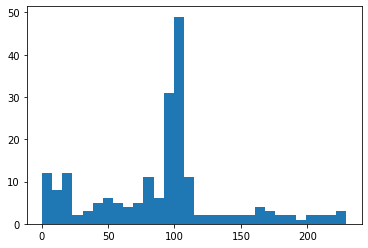

In [62]:
elec_x = electrodes.y
elec_y = electrodes.z
xx, yy = make_meshgrid(np.array(elec_x), np.array(elec_y))

dist, std = get_apic_dist_real(template_id, all_y, all_z, xx, yy, clf, verbose=True)

print(dist)
print(std)

/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_55556/1623050749.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot([xlim, xlim, -xlim, -xlim], [ylim, -ylim, ylim, -ylim], '.', marker='o', markersize=1, color='blue')


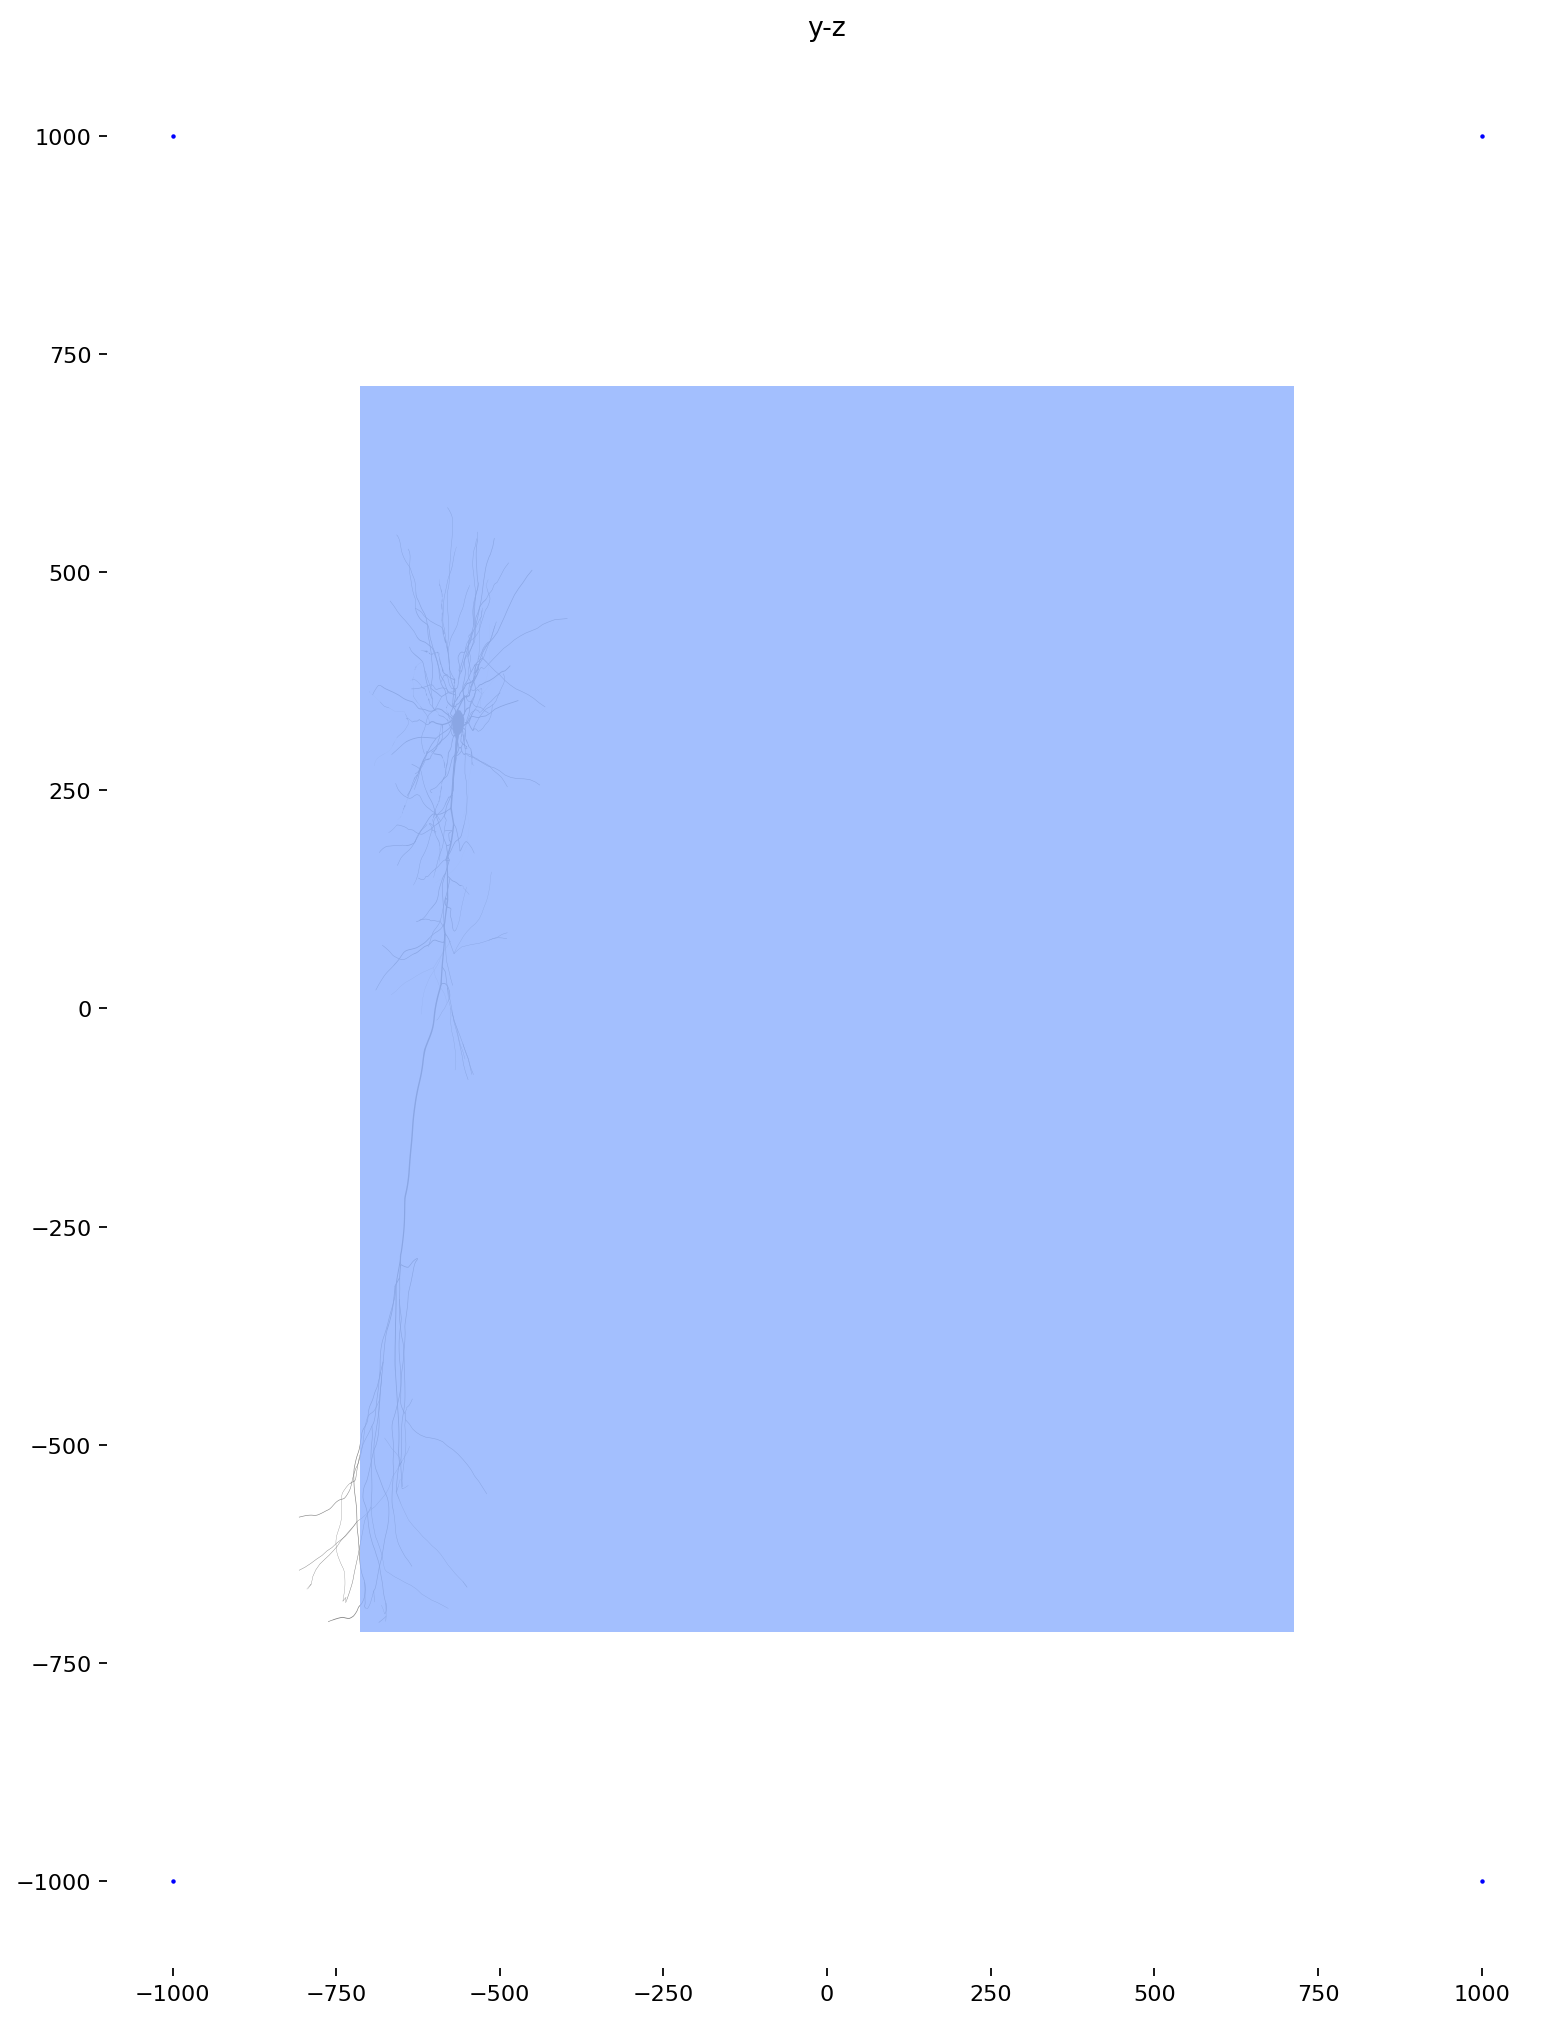

In [66]:
#elec_x = electrodes.y
#elec_y = electrodes.z
#xx, yy = make_meshgrid(np.array(elec_x), np.array(elec_y))
#boundary = get_boundary_coords(xx, yy, clf)

fig, ax = plotcell_1plane(cell, 1000, 1000)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.scatter(boundary[:, 0], boundary[:, 1], s=1, color='green')

In [58]:
# Run for all cells

# Load template
mea_name = '400MEA100'
templates_file = f'ziad_mearec_templates/mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.h5'
tempgen = mr.tools.load_templates(templates_file, verbose=False)

with open(f'mag_templates_flattened_morphology_L5_TTPC1_cADpyr232_1_n300_{mea_name}.npy', 'rb') as f:
    all_y = np.load(f)
    all_z = np.load(f)
    mags = np.load(f)
    
    
# Main loop
thresh = 0
snr = 0

electrodes = get_electrodes(mea_name)
elec_x = electrodes.y
elec_y = electrodes.z
xx, yy = make_meshgrid(np.array(elec_x), np.array(elec_y))

dists = []
dists_std = []
for template_id in range(249, 250):
    start = time.time()
    elecs = get_electrodes(mea_name)

    cell = load_cell(template_id, tempgen)
    noise = generate_noise(snr, mags[template_id], np.shape(mags[template_id]))
    coords, targets = get_strong_signals(mags[template_id] + noise, elecs, thresh)
    
    model = svm.SVC(kernel="rbf")
    clf = model.fit(coords, targets)
    
    boundary = get_boundary_coords(xx, yy, clf)
    if len(boundary) != 0:
        dist, std = get_apic_dist_real(template_id, all_y, all_z, xx, yy, clf, boundary = boundary)
    
    else:
        dist = 10000000
        std = 1000000
        
    print('Dist: ', dist)
    dists.append(dist)
    dists_std.append(std)
    print("Time: ", time.time()-start)
        

Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Mechanisms already loaded from path: /Users/Ziad/.config/mearec/1.7.2/cell_models/MEArecLinearCells/mods.  Aborting.
template cADpyr232_L5_TTPC1_0fb1ca4724 exist already
Morphology:  morphology/dend-C060114A2_axon-C060114A5.asc
Type:  <class 'str'>
Morphology is a string
Ziad Flatten Position:  [  12.52841482 -445.98278242 -730.72678532]
Ziad Faltten Rotation:  [0.06391543 0.         0.        ]
SNR:  0.0
Dist:  59.505812679974255
Time:  223.7580440044

In [63]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [57]:
dists[249]

10000000

In [59]:
for i in range(len(dists)):
    print(dists[i], '\t', dists_std[i])

59.505812679974255 	 33.91030486948078


18.014846933847227

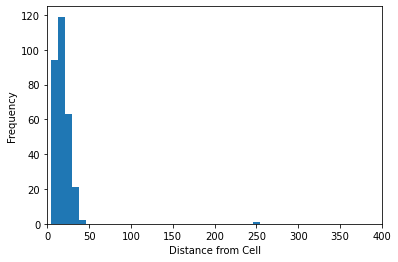

In [8]:
plt.hist(dists, bins=30)
plt.xlabel("Distance from Cell")
plt.ylabel("Frequency")
plt.xlim([0, 400])
np.mean(dists)

In [60]:
template_id

43

/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_21030/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)
/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_21030/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)
/var/folders/df/rk7rf_5s4253kn_8sb19p5x80000gn/T/ipykernel_21030/2804746349.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(electrodes.y, electrodes.z, '.', marker='o', markersize=3, color='k', zorder=0)
/var

Real morph
Real morph
Real morph
Real morph


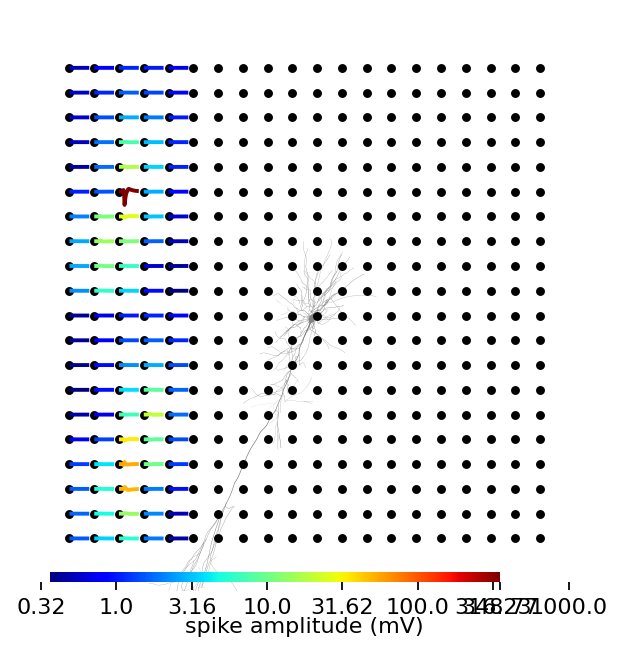

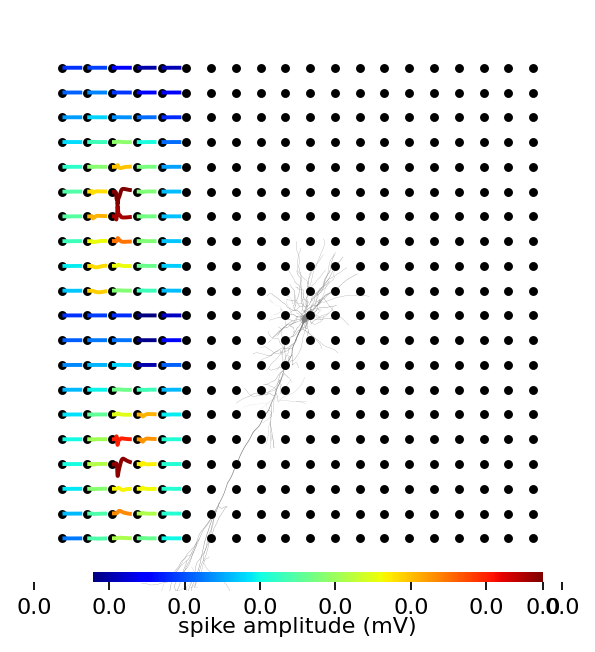

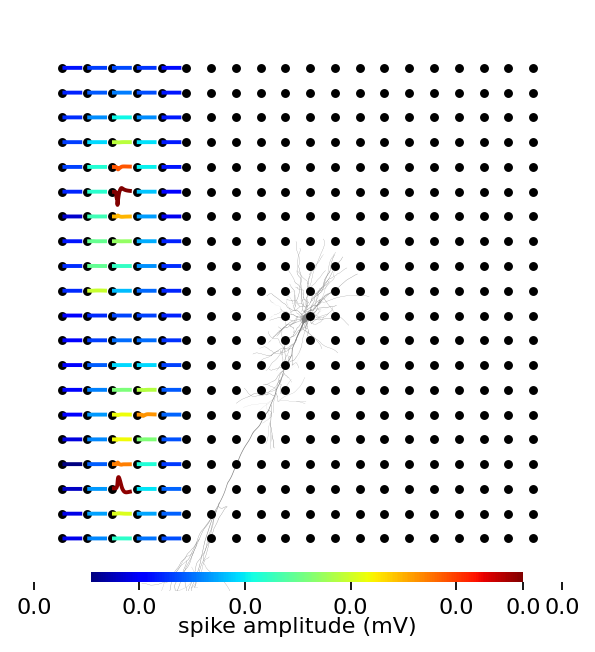

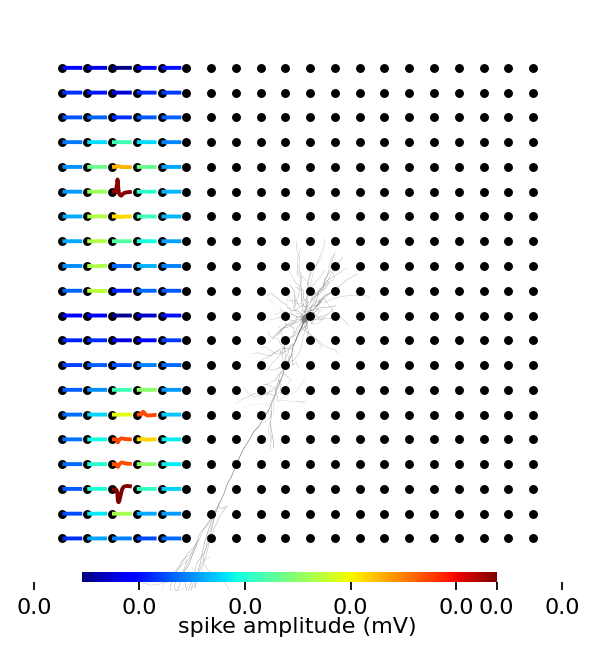

In [212]:
fig = plotstuff2(cell, t, tempgen.templates[template_id], electrodes, 0, False, real_morph, scale_mult, time_scale)
fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 0, :], electrodes, 0, False, real_morph, scale_mult, time_scale)
fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 1, :], electrodes, 0, False, real_morph, scale_mult, time_scale)
fig = plotstuff2(cell, t, tempgen.mags[template_id, :, 2, :], electrodes, 0, False, real_morph, scale_mult, time_scale)


In [127]:
ycoords = []
zcoords = []
names = []

for sec in cell.allseclist:
    if 'apic' in sec.name():
        print(sec.name())
        tempy = []
        tempz = []
        for n in range(sec.n3d()):
            print("   ", sec.y3d(n), sec.z3d(n))
            tempy.append(sec.y3d(n))
            tempz.append(sec.z3d(n))
        ycoords.append(tempy)
        zcoords.append(tempz)
        names.append(sec.name())

cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[0]
    122.44598388671875 -276.458251953125
    120.61051940917969 -271.6667785644531
    119.53350830078125 -268.51025390625
    118.44274139404297 -265.31341552734375
    117.55119323730469 -262.700439453125
    116.5698013305664 -259.82415771484375
    115.1013412475586 -255.52037048339844
    113.4284439086914 -250.61741638183594
    112.47392272949219 -247.81988525390625
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[1]
    112.47392272949219 -247.81988525390625
    112.27882385253906 -246.69195556640625
    111.24457550048828 -242.80604553222656
    110.08735656738281 -239.20216369628906
    109.07502746582031 -236.04946899414062
    108.2330093383789 -233.42718505859375
    107.1615982055664 -230.0904998779297
    105.77043151855469 -226.09170532226562
    104.4549331665039 -222.93869018554688
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[2]
    104.4549331665039 -222.93869018554688
    104.1596908569336 -222.60379028320312
    103.68431854248047 -222.325073

    97.21553802490234 -164.58763122558594
    99.65386962890625 -166.7268524169922
    101.85908508300781 -168.68885803222656
    103.34850311279297 -170.02020263671875
    103.51913452148438 -170.17437744140625
    105.53546142578125 -171.91659545898438
    105.57481384277344 -171.9464874267578
    107.35948181152344 -173.20669555664062
    107.43827819824219 -173.26329040527344
    109.4646224975586 -174.92495727539062
    109.60687255859375 -175.05076599121094
    111.57259368896484 -177.0342559814453
    113.12165069580078 -178.5660858154297
    113.16773223876953 -178.6116485595703
    114.9122543334961 -180.26487731933594
    115.17186737060547 -180.49961853027344
    117.226806640625 -182.42095947265625
    119.24259948730469 -184.3211212158203
    119.27734375 -184.35110473632812
    121.43175506591797 -186.09048461914062
    121.48969268798828 -186.13116455078125
    123.95943450927734 -187.7390594482422
    124.14750671386719 -187.8480682373047
    126.2039794921875 -189.0192

    -144.9779815673828 473.2009582519531
    -145.6322021484375 475.11834716796875
    -148.9596710205078 480.719970703125
    -151.78790283203125 485.0158386230469
    -153.5208740234375 488.62664794921875
    -156.34654235839844 493.8077392578125
    -158.87095642089844 499.7964172363281
    -160.66737365722656 506.6103515625
    -162.4195556640625 511.4307861328125
    -163.2357177734375 515.5953369140625
    -164.80690002441406 520.7607421875
    -166.63719177246094 526.8372192382812
    -168.85186767578125 533.883544921875
    -172.2822265625 540.4485473632812
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[75]
    -140.5426788330078 463.175048828125
    -140.42739868164062 462.8371887207031
    -140.3033905029297 462.4737243652344
    -140.19326782226562 462.1510009765625
    -139.99952697753906 461.5831604003906
    -139.84678649902344 461.1354675292969
    -139.913818359375 458.5028076171875
    -140.02244567871094 457.7314147949219
    -139.3507537841797 455.60113525390625
    -140.1838

    -198.72166442871094 662.6124877929688
    -198.7339630126953 662.6294555664062
    -200.7877197265625 665.193603515625
    -202.01205444335938 666.6248779296875
    -203.76783752441406 668.5617065429688
    -205.53868103027344 670.3560180664062
    -205.55441284179688 670.3717651367188
    -206.77723693847656 671.4232177734375
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[88]
    -206.77723693847656 671.4232177734375
    -208.54666137695312 674.8663330078125
    -209.64935302734375 677.015380859375
    -211.408203125 680.4408569335938
    -212.31793212890625 682.2119140625
    -213.77674865722656 685.05322265625
cADpyr232_L5_TTPC1_0fb1ca4724[2].apic[89]
    -213.77674865722656 685.05322265625
    -212.28428649902344 687.770751953125
    -210.95957946777344 689.8076171875
    -210.9439239501953 689.8341064453125
    -209.45875549316406 692.1159057617188
    -208.03146362304688 694.3041381835938
    -206.7814178466797 696.23095703125
    -206.64186096191406 696.4053955078125
cADpyr232_L5_TTP

In [120]:
dir(tempgen)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_verbose',
 'celltypes',
 'generate_templates',
 'info',
 'locations',
 'mags',
 'params',
 'rotations',
 'templates']

In [129]:
len(tempgen.locations)

600

In [35]:
electrodes.y

array([-337.5, -337.5, -337.5, -337.5, -337.5, -337.5, -337.5, -337.5,
       -337.5, -337.5, -262.5, -262.5, -262.5, -262.5, -262.5, -262.5,
       -262.5, -262.5, -262.5, -262.5, -187.5, -187.5, -187.5, -187.5,
       -187.5, -187.5, -187.5, -187.5, -187.5, -187.5, -112.5, -112.5,
       -112.5, -112.5, -112.5, -112.5, -112.5, -112.5, -112.5, -112.5,
        -37.5,  -37.5,  -37.5,  -37.5,  -37.5,  -37.5,  -37.5,  -37.5,
        -37.5,  -37.5,   37.5,   37.5,   37.5,   37.5,   37.5,   37.5,
         37.5,   37.5,   37.5,   37.5,  112.5,  112.5,  112.5,  112.5,
        112.5,  112.5,  112.5,  112.5,  112.5,  112.5,  187.5,  187.5,
        187.5,  187.5,  187.5,  187.5,  187.5,  187.5,  187.5,  187.5,
        262.5,  262.5,  262.5,  262.5,  262.5,  262.5,  262.5,  262.5,
        262.5,  262.5,  337.5,  337.5,  337.5,  337.5,  337.5,  337.5,
        337.5,  337.5,  337.5,  337.5])

In [36]:
np.shape(mags)

(300, 100, 224)

In [104]:
coords = np.zeros((2, np.shape(all_y)[1]))
coords[0] = all_y[0]
coords[1] = all_z[0]
clf.decision_function(coords.T)

array([ 1.54368809,  1.53705797,  1.53027931,  1.52335275,  1.51627935,
        1.50905991,  1.50169518,  1.49418615,  1.48653376,  1.47873899,
        1.4708029 ,  1.46272647,  1.4545108 ,  1.44615706,  1.43766632,
        1.4290398 ,  1.42027875,  1.41138433,  1.40235791,  1.39320072,
        1.38391414,  1.40437219,  1.37098303,  1.34866107,  1.3253843 ,
        1.3058719 ,  1.28390134,  1.25009723,  1.21029192,  1.18699284,
        1.18699284,  1.1783017 ,  1.1463134 ,  1.11514727,  1.08740194,
        1.06400182,  1.03382839,  0.99665804,  0.96601857,  0.96601857,
        0.93561289,  0.91718308,  0.89204719,  0.85849919,  0.83488583,
        0.82540919,  0.82540919,  0.80396532,  0.76516762,  0.72884295,
        0.70220623,  0.68028821,  0.68028821,  0.67488656,  0.64526963,
        0.61838796,  0.58650057,  0.55591075,  0.52707262,  0.50740195,
        0.50740195,  0.49771449,  0.4612454 ,  0.41441082,  0.36863327,
        0.33403743,  0.29429474,  0.29186009,  0.26278979,  0.23

In [102]:
np.shape(all_y)

(300, 203)

In [137]:
a = distance.cdist(np.array([[5, 4], [3, 2]]), np.array([[2, 1], [7, -4]]), 'euclidean')
print(a)

[[4.24264069 8.24621125]
 [1.41421356 7.21110255]]


In [132]:
np.linalg.norm([-2, 8])

8.246211251235321

In [138]:
np.min(a, axis=1)

array([4.24264069, 1.41421356])

In [29]:
a = np.random.normal(size=(4, 12))
print(a)
print(np.sum(a**2))

[[-1.87246997  0.07946121 -0.0483342  -1.79496809 -1.02137469  1.38843632
   1.40356813 -0.25396024  0.84359924  0.56870597 -1.17622818 -0.27345609]
 [ 0.52735097  0.39042616  0.13033959  0.19981532 -0.48311875  0.54728143
   0.36900507  1.2770285   0.37082864  0.16772016 -0.33940244  0.80476943]
 [ 0.82771938  0.91956475 -1.26963363  0.58164068  0.13897755  1.9008353
  -0.02480526  0.14583166  0.2319272   1.57215669  0.02814102 -0.17283715]
 [ 1.849542   -1.4240458   0.75765999  1.21570875 -0.35617465  0.5882353
  -1.98302128 -1.46955427  0.18154322  0.61305674  0.44212396  0.87619922]]
43.08041309763577


In [32]:
generate_noise(30, mags[0], np.shape(mags[0]))

SNR:  30.0


In [67]:
a = 5

In [68]:
a == None

False